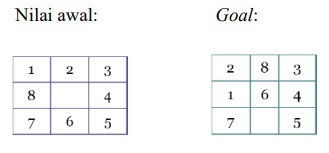

In [1]:
from IPython.display import Image
Image(filename='gambarkasus2.jpg')

In [5]:
class AntrianPrioritas:
    def __init__(self):
        self.heap = []

    def tambah(self, k):
        self.heap.append(k)

    def hapus(self):
        min_elemen = min(self.heap)
        self.heap.remove(min_elemen)
        return min_elemen

    def kosong(self):
        return len(self.heap) == 0

class simpul:
    def __init__(self, induk, matriks, posisi_kotak_kosong, biaya, level):
        self.induk = induk
        self.matriks = matriks
        self.posisi_kotak_kosong = posisi_kotak_kosong
        self.biaya = biaya
        self.level = level

    def __lt__(self, berikutnya):
        return self.biaya < berikutnya.biaya

def hitungBiaya(matriks, akhir):
    count = 0
    for i in range(n):
        for j in range(n):
            if matriks[i][j] and matriks[i][j] != akhir[i][j]:
                count += 1
    return count

def simpulBaru(matriks, posisi_kotak_kosong, posisi_kotak_kosong_baru, level, induk, akhir):
    matriks_baru = [list(row) for row in matriks]
    x1, y1 = posisi_kotak_kosong
    x2, y2 = posisi_kotak_kosong_baru
    matriks_baru[x1][y1], matriks_baru[x2][y2] = matriks_baru[x2][y2], matriks_baru[x1][y1]
    biaya = hitungBiaya(matriks_baru, akhir)
    return simpul(induk, matriks_baru, posisi_kotak_kosong_baru, biaya, level)

def cetakMatriks(matriks):
    for i in range(n):
        for j in range(n):
            print("%d " % (matriks[i][j]), end=" ")
        print()

def aman(x, y):
    return 0 <= x < n and 0 <= y < n

def cetakJalur(akar):
    if akar is None:
        return
    cetakJalur(akar.induk)
    cetakMatriks(akar.matriks)
    print()

def solusi(mulai, posisi_kotak_kosong, akhir):
    antrian_prioritas = AntrianPrioritas()
    biaya = hitungBiaya(mulai, akhir)
    akar = simpul(None, mulai, posisi_kotak_kosong, biaya, 0)
    antrian_prioritas.tambah(akar)

    while not antrian_prioritas.kosong():
        minimum = antrian_prioritas.hapus()
        if minimum.biaya == 0:
            cetakJalur(minimum)
            return

        for i in range(4):
            posisi_kotak_kosong_baru = [minimum.posisi_kotak_kosong[0] + baris[i], minimum.posisi_kotak_kosong[1] + kolom[i]]
            if aman(posisi_kotak_kosong_baru[0], posisi_kotak_kosong_baru[1]):
                anak = simpulBaru(minimum.matriks, minimum.posisi_kotak_kosong, posisi_kotak_kosong_baru, minimum.level + 1, minimum, akhir)
                antrian_prioritas.tambah(anak)
                

n = 3
baris = [1, 0, -1, 0]
kolom = [0, -1, 0, 1]

awal = [[1, 2, 3],
        [8, 0, 4],
        [7, 6, 5]]

akhir = [[2, 8, 3],
         [1, 6, 4],
         [7, 0, 5]]

posisi_kotak_kosong = [2, 1]

solusi(awal, posisi_kotak_kosong, akhir)


1  2  3  
8  0  4  
7  6  5  

1  2  3  
8  6  4  
7  0  5  

1  2  3  
6  8  4  
7  0  5  

6  2  3  
1  8  4  
7  0  5  

2  6  3  
1  8  4  
7  0  5  

2  8  3  
1  6  4  
7  0  5  

